In [1]:
# Import torch
import torch

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [2]:
# Setup random seed
RANDOM_SEED = 42

torch.manual_seed(RANDOM_SEED)

### 1. Make a binary classification dataset with Scikit-Learn's `make_moons()` function.

- For consistency, the dataset should have 1000 samples and a random_state=42.
- Turn the data into PyTorch tensors.
- Split the data into training and test sets using train_test_split with 80% training and 20% testing.

In [3]:
from sklearn.datasets import make_moons

X_numpy, y_numpy = make_moons(n_samples=1000, random_state=RANDOM_SEED)

X_numpy[:5], y_numpy[:5]

(array([[ 0.00872719,  0.36817352],
        [ 0.921384  , -0.49690497],
        [ 0.94022577, -0.49821192],
        [ 0.46587532, -0.34540571],
        [-0.85041204,  0.52611726]]),
 array([1, 1, 1, 1, 0]))

In [4]:
# Turn data into a DataFrame
import pandas as pd

df = pd.DataFrame({
    "X1": X_numpy[:, 0],
    "X2": X_numpy[:, 1],
    "label": y_numpy
})
df.head()

,X1,X2,label
0,0.008727,0.368174,1
1,0.921384,-0.496905,1
2,0.940226,-0.498212,1
3,0.465875,-0.345406,1
4,-0.850412,0.526117,0


In [5]:
df.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

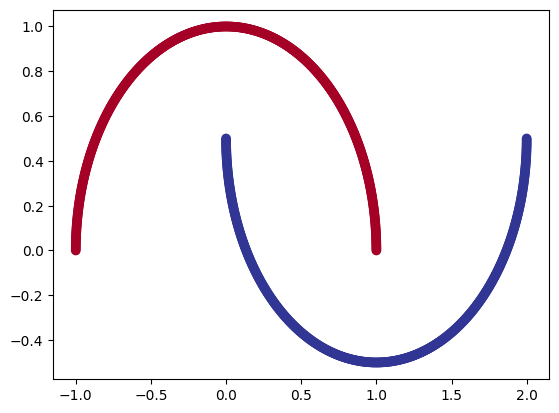

In [6]:
import matplotlib.pyplot as plt

plt.scatter(
    x=X_numpy[:, 0],
    y=X_numpy[:, 1],
    c=y_numpy,
    cmap=plt.cm.RdYlBu
)

In [7]:
# Turn data into tensors of dtype float
X = torch.from_numpy(X_numpy).type(torch.float)
y = torch.from_numpy(y_numpy).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.0087,  0.3682],
         [ 0.9214, -0.4969],
         [ 0.9402, -0.4982],
         [ 0.4659, -0.3454],
         [-0.8504,  0.5261]]),
 tensor([1., 1., 1., 1., 0.]))

In [8]:
# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [9]:
NUM_FEATURES = 2
NUM_CLASSES = 1

### 2. Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in 1.

- Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [10]:
import torch 
from torch import nn

class MoonModelV0(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=10):
        super().__init__()
        self.non_linear_layer = nn.Sequential(
            nn.Linear(input_features, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, output_features)
        )

    def forward(self, x):
        x = self.non_linear_layer(x)
        return x


In [11]:
# Instantiate the model
model_0 = MoonModelV0(
    NUM_FEATURES,
    NUM_CLASSES
).to(device)
model_0, model_0.state_dict()

(MoonModelV0(
   (non_linear_layer): Sequential(
     (0): Linear(in_features=2, out_features=10, bias=True)
     (1): ReLU()
     (2): Linear(in_features=10, out_features=10, bias=True)
     (3): ReLU()
     (4): Linear(in_features=10, out_features=1, bias=True)
   )
 ),
 OrderedDict([('non_linear_layer.0.weight',
               tensor([[ 0.5406,  0.5869],
                       [-0.1657,  0.6496],
                       [-0.1549,  0.1427],
                       [-0.3443,  0.4153],
                       [ 0.6233, -0.5188],
                       [ 0.6146,  0.1323],
                       [ 0.5224,  0.0958],
                       [ 0.3410, -0.0998],
                       [ 0.5451,  0.1045],
                       [-0.3301,  0.1802]], device='cuda:0')),
              ('non_linear_layer.0.bias',
               tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                        0.0667, -0.6984], device='cuda:0')),
              ('non_linear_layer.2.

### 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [12]:
# Setup loss function
loss_fn = nn.BCEWithLogitsLoss()
# Setup optimizer to optimize model's parameters
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)

#### 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.

- Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
- To measure model accuray, you can create your own accuracy function or use the accuracy function in TorchMetrics.
- Train the model for long enough for it to reach over 96% accuracy.
- The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [13]:
# What's coming out of our model?
logits =model_0(X_train.to(device))[:5]
# logits (raw outputs of model)
print(f"Logits:{logits}")
## Your code here ##
pred_probs = torch.sigmoid(logits)
# Prediction probabilities
print(f"Pred probs:{pred_probs}")
## Your code here ##
pred_labels = torch.round(pred_probs)
# Prediction labels
print(f"Pred labels:{pred_labels}")

true_labels = y_train[:6]
print(f"True Labels:{true_labels}")

Logits:tensor([[0.0014],
        [0.0101],
        [0.0185],
        [0.0182],
        [0.0289]], device='cuda:0', grad_fn=<SliceBackward0>)
Pred probs:tensor([[0.5003],
        [0.5025],
        [0.5046],
        [0.5046],
        [0.5072]], device='cuda:0', grad_fn=<SigmoidBackward0>)
Pred labels:tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0', grad_fn=<RoundBackward0>)
True Labels:tensor([1., 0., 0., 0., 1., 0.])


In [14]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
# %pip -q install torchmetrics # Colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: Uncomment this code to use the Accuracy function
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
acc_fn

/home/ssliang/miniconda3/envs/pytorh_ssliang/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


MulticlassAccuracy()

In [15]:
## TODO: Uncomment this to set the seed
torch.manual_seed(RANDOM_SEED)

# Setup epochs
epochs = 2000

# Send data to the device
X_train ,y_train = X_train.to(device), y_train.to(device)
X_test ,y_test = X_test.to(device), y_test.to(device)

# Loop through the data
for epoch in range(epochs):
    ### Training
    model_0.train() # set model train

    # 1. Forward pass (logits output)
    y_logits = model_0(X_train).squeeze()

    # Turn logits into prediction probabilities
    y_pred_probs = torch.sigmoid(y_logits)

    # Turn prediction probabilities into prediction labels
    y_pred_labels = torch.round(y_pred_probs)

    # 2. Calculaute the loss
    loss = loss_fn(y_logits, y_train) # loss = compare model raw outputs to desired model outputs

    # Calculate the accuracy
    acc = acc_fn(y_pred_labels, y_train) # the accuracy function needs to compare pred labels (not logits) with actual labels

    # 3. Zero the gradients
    optimizer.zero_grad()

    # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
    loss.backward()

    # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression)
    optimizer.step()

    ### Testing
    model_0.eval() 
    with torch.inference_mode():
        # 1. Forward pass (to get the logits)
        y_test_logits = model_0(X_test).squeeze()
        # Turn the test logits into prediction labels
        y_test_pred = torch.round(torch.sigmoid(y_test_logits))

        # 2. Caculate the test loss/acc
        test_loss = loss_fn(y_test_logits, y_test)
        test_acc = acc_fn(y_test_pred, y_test)

    # Print out what's happening every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train Loss: {loss.item():.5f} | Train Acc: {acc:.2f} | Test Loss: {test_loss.item():.5f} | Test Acc: {test_acc:.2f}")

Epoch: 0 | Train Loss: 0.69536 | Train Acc: 0.37 | Test Loss: 0.69462 | Test Acc: 0.50
Epoch: 100 | Train Loss: 0.38584 | Train Acc: 0.82 | Test Loss: 0.40274 | Test Acc: 0.76
Epoch: 200 | Train Loss: 0.23521 | Train Acc: 0.89 | Test Loss: 0.23915 | Test Acc: 0.91
Epoch: 300 | Train Loss: 0.18844 | Train Acc: 0.92 | Test Loss: 0.18707 | Test Acc: 0.93
Epoch: 400 | Train Loss: 0.14797 | Train Acc: 0.94 | Test Loss: 0.14573 | Test Acc: 0.94
Epoch: 500 | Train Loss: 0.10225 | Train Acc: 0.96 | Test Loss: 0.09955 | Test Acc: 0.98
Epoch: 600 | Train Loss: 0.06423 | Train Acc: 0.99 | Test Loss: 0.06165 | Test Acc: 0.99
Epoch: 700 | Train Loss: 0.04051 | Train Acc: 1.00 | Test Loss: 0.03834 | Test Acc: 1.00
Epoch: 800 | Train Loss: 0.02720 | Train Acc: 1.00 | Test Loss: 0.02539 | Test Acc: 1.00
Epoch: 900 | Train Loss: 0.01952 | Train Acc: 1.00 | Test Loss: 0.01800 | Test Acc: 1.00
Epoch: 1000 | Train Loss: 0.01478 | Train Acc: 1.00 | Test Loss: 0.01350 | Test Acc: 1.00
Epoch: 1100 | Train Lo

### 5. Make predictions with your trained model and plot them using the plot_decision_boundary() function created in this notebook.


In [16]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):
    
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/ 
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), 
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else: 
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary
    
    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())



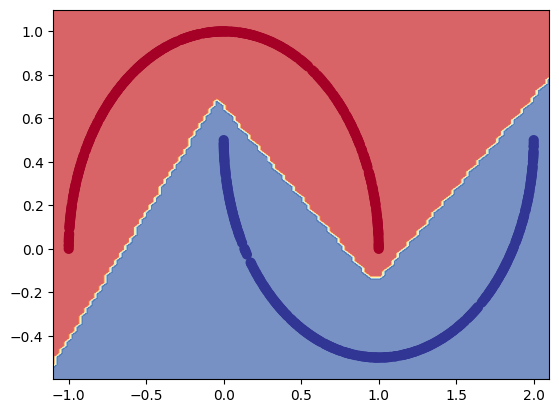

In [17]:
# Plot decision boundaries for training sets
plot_decision_boundary(model_0, X_train, y_train)

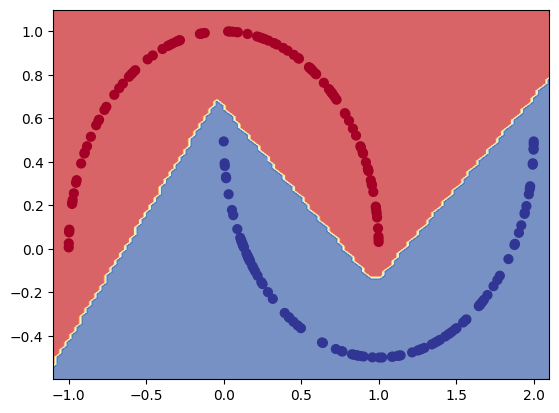

In [18]:
# Plot decision boundaries for test sets
plot_decision_boundary(model_0, X_test, y_test)

### 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.

- Feel free to reference the ML cheatsheet website for the formula.


### 7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).

- Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.

- Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).

- Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).

- Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.

- Plot the decision boundaries on the spirals dataset from your model predictions, the plot_decision_boundary() function should work for this dataset too.


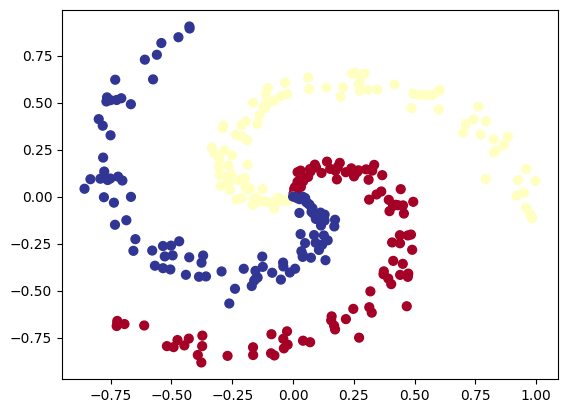

In [19]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [20]:
# Turn data into tensors
import torch
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED
)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

X_train.shape, y_train.shape

(torch.Size([240, 2]), torch.Size([240]))

In [21]:
from torchmetrics import Accuracy

acc_fn = Accuracy(task="multiclass", num_classes=5).to(device)
acc_fn

MulticlassAccuracy()

In [22]:
NUM_FEATURES = 2
NUM_CLASSES = 4

In [23]:
# Create model by subclassing nn.Module
class ClassificationModelV1(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=10):
        super().__init__()
        self.linear_non_linear = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.Tanh(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.Tanh(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, x):
        x = self.linear_non_linear(x)
        return x

# Instantiate model and send it to device
model_1 = ClassificationModelV1(
    input_features=NUM_FEATURES,
    output_features=NUM_CLASSES
).to(device)

model_1, model_1.state_dict()

(ClassificationModelV1(
   (linear_non_linear): Sequential(
     (0): Linear(in_features=2, out_features=10, bias=True)
     (1): Tanh()
     (2): Linear(in_features=10, out_features=10, bias=True)
     (3): Tanh()
     (4): Linear(in_features=10, out_features=4, bias=True)
   )
 ),
 OrderedDict([('linear_non_linear.0.weight',
               tensor([[ 0.5406,  0.5869],
                       [-0.1657,  0.6496],
                       [-0.1549,  0.1427],
                       [-0.3443,  0.4153],
                       [ 0.6233, -0.5188],
                       [ 0.6146,  0.1323],
                       [ 0.5224,  0.0958],
                       [ 0.3410, -0.0998],
                       [ 0.5451,  0.1045],
                       [-0.3301,  0.1802]], device='cuda:0')),
              ('linear_non_linear.0.bias',
               tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                        0.0667, -0.6984], device='cuda:0')),
              ('linear

In [24]:
# What's coming out of our model?
logits = model_1(X_train.to(device))[:5]
# logits (raw outputs of model)
print(f"Logits:{logits}")
## Your code here ##
pred_probs = torch.sigmoid(logits)
# Prediction probabilities
print(f"Pred probs:{pred_probs}")
## Your code here ##
pred_labels = torch.round(pred_probs)
# Prediction labels
print(f"Pred labels:{pred_labels}")

true_labels = y_train[:6]
print(f"True Labels:{true_labels}")

Logits:tensor([[-0.0051, -0.0268, -0.0653, -0.0911],
        [-0.0373, -0.1030, -0.0767, -0.0757],
        [-0.0041,  0.0542, -0.0467, -0.1078],
        [-0.0768,  0.0012, -0.0401, -0.0982],
        [-0.0451,  0.1116, -0.0214, -0.1253]], device='cuda:0',
       grad_fn=<SliceBackward0>)
Pred probs:tensor([[0.4987, 0.4933, 0.4837, 0.4772],
        [0.4907, 0.4743, 0.4808, 0.4811],
        [0.4990, 0.5136, 0.4883, 0.4731],
        [0.4808, 0.5003, 0.4900, 0.4755],
        [0.4887, 0.5279, 0.4947, 0.4687]], device='cuda:0',
       grad_fn=<SigmoidBackward0>)
Pred labels:tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]], device='cuda:0', grad_fn=<RoundBackward0>)
True Labels:tensor([2, 0, 0, 1, 1, 0], device='cuda:0')


In [25]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.001)

In [26]:
y_train.shape

torch.Size([240])

In [27]:
# Build a training loop for the model
epochs = 2000
# Loop over data
for epoch in range(epochs):

    ## Training
    model_1.train()    
    # 1. Forward pass
    y_logits = model_1(X_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    # 2. Calculate the loss
    loss = loss_fn(y_logits, y_train)
    acc = acc_fn(y_pred, y_train)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ## Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        y_test_logits = model_1(X_test)
        y_test_pred = torch.softmax(y_test_logits, dim=1).argmax(dim=1)
        # 2. Caculate loss and acc
        test_loss = loss_fn(y_test_logits, y_test)
        acc = acc_fn(y_test_pred, y_test)

    # Print out what's happening every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train Loss: {loss.item():.5f} | Train Acc: {acc * 100:.2f} % | Test Loss: {test_loss.item():.5f} | Test Acc: {acc * 100:.2f} %")

Epoch: 0 | Train Loss: 1.35122 | Train Acc: 46.67 % | Test Loss: 1.35309 | Test Acc: 46.67 %
Epoch: 100 | Train Loss: 1.08749 | Train Acc: 55.00 % | Test Loss: 1.09181 | Test Acc: 55.00 %
Epoch: 200 | Train Loss: 0.88540 | Train Acc: 53.33 % | Test Loss: 0.89489 | Test Acc: 53.33 %
Epoch: 300 | Train Loss: 0.79109 | Train Acc: 50.00 % | Test Loss: 0.81223 | Test Acc: 50.00 %
Epoch: 400 | Train Loss: 0.74433 | Train Acc: 48.33 % | Test Loss: 0.77145 | Test Acc: 48.33 %
Epoch: 500 | Train Loss: 0.69584 | Train Acc: 51.67 % | Test Loss: 0.72765 | Test Acc: 51.67 %
Epoch: 600 | Train Loss: 0.63129 | Train Acc: 55.00 % | Test Loss: 0.66317 | Test Acc: 55.00 %
Epoch: 700 | Train Loss: 0.54914 | Train Acc: 68.33 % | Test Loss: 0.57323 | Test Acc: 68.33 %
Epoch: 800 | Train Loss: 0.45837 | Train Acc: 80.00 % | Test Loss: 0.46430 | Test Acc: 80.00 %
Epoch: 900 | Train Loss: 0.37805 | Train Acc: 85.00 % | Test Loss: 0.36739 | Test Acc: 85.00 %
Epoch: 1000 | Train Loss: 0.31297 | Train Acc: 90.00

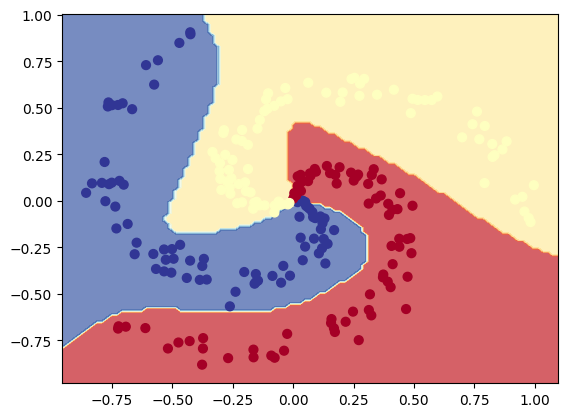

In [28]:
# Plot decision boundaries for training and test sets
plot_decision_boundary(model_1, X_train, y_train)

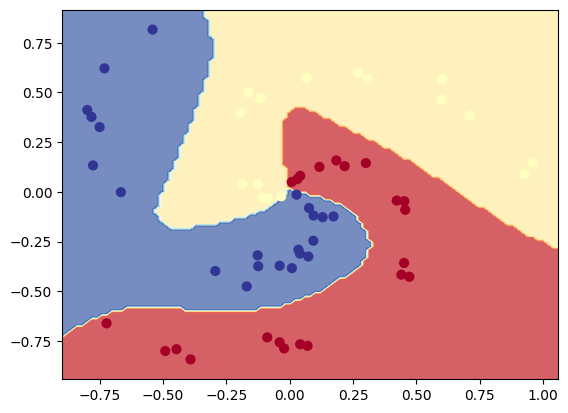

In [29]:
plot_decision_boundary(model_1, X_test, y_test)